In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# A review of log-log plots
Most of the plots you're used to seeing are probably linear along the x and y axes, like so:

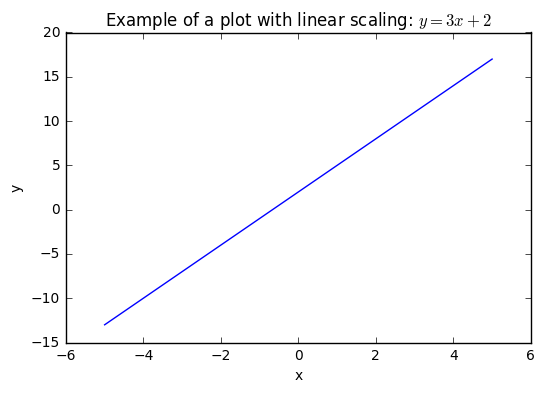

In [7]:
xvals = np.linspace(-5,5)
plt.plot(xvals, xvals*3+2)
plt.title("Example of a plot with linear scaling: $y = 3x+2$")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

However, in astronomy, a lot of the time we look at information spanning many orders of magnitude, so it is often more useful to use log-log plots instead

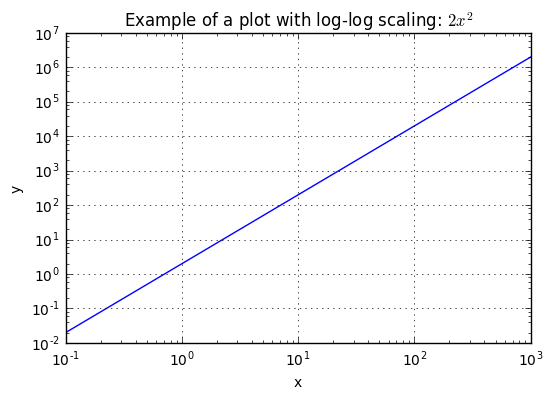

In [16]:
xvals = np.logspace(np.log10(0.1),np.log10(1000))
plt.loglog(xvals, 2*xvals**2)
plt.title("Example of a plot with log-log scaling: $2x^2$")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.xlim(xmin = 1.e-1, xmax = 1.e3)
plt.ylim(ymin = 1.e-2, ymax = 1.e7)
plt.show()

Oftentimes a plot like the one above will be shown with just the exponents of the powers of 10 on the x and y axes, like so:

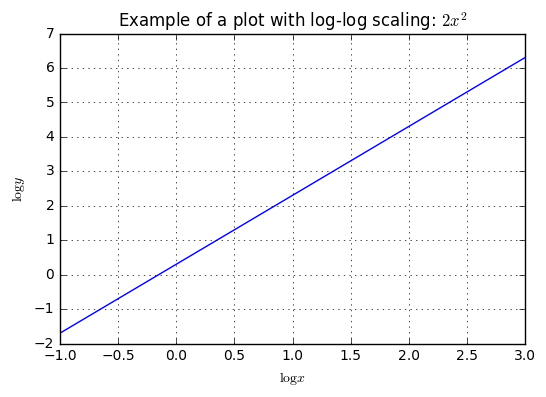

In [20]:
xvals = np.linspace(np.log10(0.1),np.log10(1000))
plt.plot(xvals, np.log10(2)+2*xvals)
plt.title("Example of a plot with log-log scaling: $2x^2$")
plt.xlabel('$\log x$')
plt.ylabel('$\log y$')
plt.xlim(xmin = -1, xmax = 3)
plt.ylim(ymin = -2, ymax = 7)
plt.grid()
plt.show()

# Q1: 
We see from the plot above that on a log-log scale, $2x^2$ shows up as a straight line. Given the log-log plot below, write an expression for $y$ as a function of $x$. Here are some relationships that may be helpful: 

$10^{\log_{10}a} = a$ 

$\log a +\log b = \log ab$

$b\log a = \log a^b$

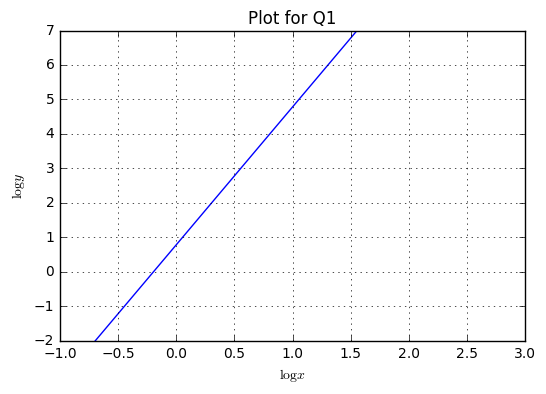

In [21]:
xvals = np.linspace(np.log10(0.1),np.log10(1000))
plt.plot(xvals, np.log10(6)+4*xvals)
plt.title("Plot for Q1")
plt.xlabel('$\log x$')
plt.ylabel('$\log y$')
plt.xlim(xmin = -1, xmax = 3)
plt.ylim(ymin = -2, ymax = 7)
plt.grid()
plt.show()

Log-log plots can make it easier to notice trends that would otherwise be difficult to see in a linear plot because of the dynamic range involved. Let's first consider a plot of a broken power law:

\begin{equation}
   y\left(x\right) = \left\{
     \begin{array}{lr}
       \left( \frac{x}{10} \right)^{1.5} & : x<10\\
       \left( \frac{x}{10} \right)^{2.5} & : x\geq10
     \end{array}
   \right.\\
\end{equation}

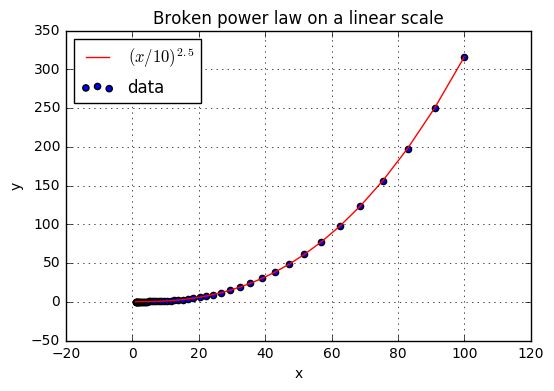

In [56]:
def broken_law(x):
    if x<10:
        return (x/10.)**1.5
    else:
        return (x/10.)**2.5
    
xvals = np.logspace(np.log10(1),np.log10(100))
plt.scatter(xvals, [broken_law(x) for x in xvals], label = 'data')
plt.plot(xvals, (xvals/10.)**2.5, color = 'red', label = '$(x/10)^{2.5}$')
plt.title("Broken power law on a linear scale")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend(loc = 'upper left')
plt.show()    

On the linear scale, it's hard to tell the difference between a broken power law and a single power law. However, when we switch to the log-log scale, the difference is a lot more obvious. 

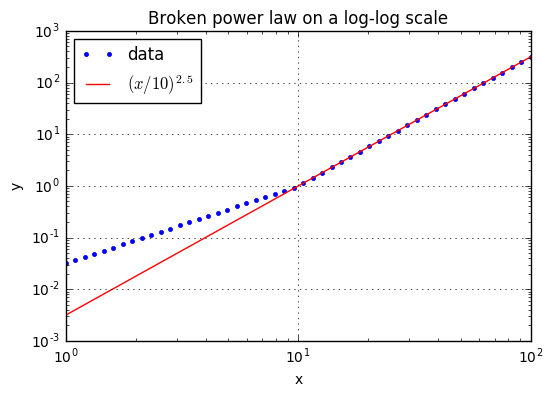

In [54]:
xvals = np.logspace(np.log10(1),np.log10(100))
plt.loglog(xvals, [broken_law(x) for x in xvals], linestyle ='', marker = '.', label = 'data')
plt.loglog(xvals,(xvals/10.)**2.5, color = 'red', label = '$(x/10)^{2.5}$')
plt.title("Broken power law on a log-log scale")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend(loc = 'upper left')
plt.show()

# Initial Mass Functions

In astronomy, power laws and broken laws are often used to model the relationships between different variables. One example is the initial mass function, which describes the number of stars that form in the interval between a mass of $M$ and $M+\Delta M$. One famous IMF is the Salpeter IMF:

$\xi (M) = \frac{dN}{dM} = CM^{-2.35} $,

where $M$ is the mass of the star and $C$ is some normalization constant. (Note that the Salpeter IMF is strongly simplified, and that in practice more detailed IMFs are used, such as the [Kroupa IMF](http://adsabs.harvard.edu/abs/2001MNRAS.322..231K).)

The total number of stars in a given mass interval between $M_1$ and $M_2$

is $N = \int_{M_1}^{M_2} \xi (M)\, dM = C\int_{M_1}^{M_2} M^{-2.35}\, dM$

# Q2: 

Setting $C=1$, use Python to plot the Salpeter IMF on a log-log scale for a mass range from 0.5 solar masses to 100 solar masses

# Q3

Using the Salpeter IMF, write an expression for the total stellar mass in a given mass interval between $M_1$ and $M_2$. You should first get something in the form $M_{tot} \propto \int_{M_1}^{M_2} M^{-x}\, dM$, and then you should evaluate the integral expression. Ignoring constant scaling factors to make your life easy, try plugging in different values of $M_1$ and $M_2$ and then plug in $M_1$ = 0.5 and $M_2$ = 100 solar masses to calculate a "relative total stellar mass." What kind of stars contribute most of the total stellar mass? 

# Q4

Roughly speaking, stellar mass and luminosity scale together such that $L=L_0 M^3$, where $L_0$ is some constant. Again using the Salpeter IMF, write an expression for the total luminosity in a given mass interval between $M_1$ and $M_2$. You should first get something in the form $L_{tot} \propto \int_{M_1}^{M_2} M^{-y}\, dM$, and then you should evaluate the integral expression. Ignoring constant scaling factors to make your life easy, try plugging in different values of $M_1$ and $M_2$ and then plug in $M_1$ = 0.5 and $M_2$ = 100 solar masses to calculate a "relative total stellar luminosity." What kind of stars contribute most of the total stellar luminosity? 